In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
area    60 non-null int64
rent    60 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


In [6]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


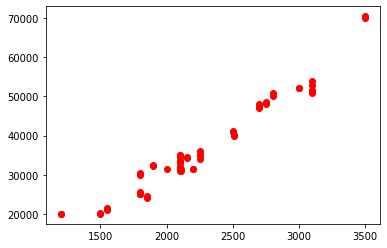

In [7]:
plt.scatter(df.area, df.rent, color='red')

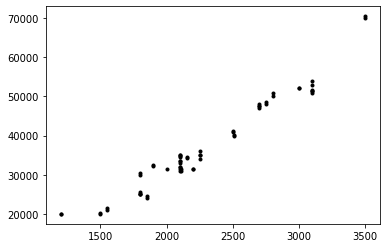

In [8]:
plt.scatter(df['area'], df['rent'], color='black', marker='.')

Text(0.5, 1.0, 'Rent in Bangladesh')

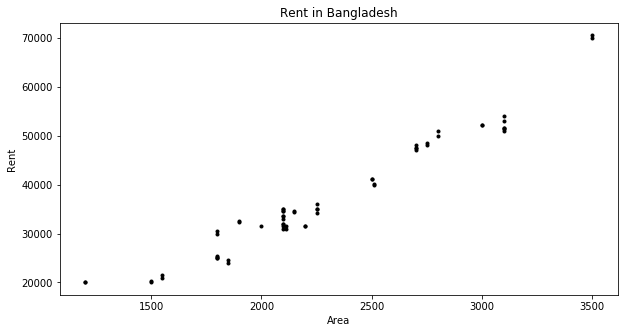

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df['area'], df['rent'], color='black', marker='.')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent in Bangladesh")

In [10]:
df.area.mean()

2289.0

In [11]:
df.rent.mean()

37269.166666666664

In [12]:
len(df.area)

60

In [13]:
df.shape

(60, 2)

# Spliting data set in X and Y

In [14]:
#x = df[['area']] #independent variables, x must be 2D array so we use double bracket
#or we can drop rent and get the data into X
x = df.drop('rent', axis=1)
y = df['rent'] #dependent variable

# Split the dataset

In [15]:
df.head(10)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
#xtrain, xtest, ytrain, ytest = tts(x,y, train_size=.70) #or train_size = 0.3

In [18]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=.3, random_state = 42) #we use random state for using the smae data

In [19]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression() # crating object for linear model

In [22]:
lr.fit(xtrain, ytrain) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
xtrain.shape

(42, 1)

In [24]:
lr.coef_

array([20.68636687])

In [25]:
lr.intercept_

-10252.904740336751

In [26]:
m = lr.coef_
c = lr.intercept_

In [27]:
x = 1500
y = (m * x) + c

In [28]:
y

array([20776.64556701])

In [29]:
lr.predict([[1500]])

array([20776.64556701])

In [30]:
lr.predict(df[['area']])

array([31119.82900279, 33188.46568994, 41463.01243857, 36291.42072068,
       51806.19587435, 29051.19231563, 20776.64556701, 28016.87397205,
       45600.28581288, 33188.46568994, 34222.78403352, 33188.46568994,
       33188.46568994, 41669.87610729, 36291.42072068, 53874.83256151,
       26982.55562848, 21810.96391059, 26982.55562848, 45600.28581288,
       33395.32935866, 33188.46568994, 62149.37931013, 14570.73550554,
       47668.92250004, 53874.83256151, 46634.60415646, 26982.55562848,
       35257.1023771 , 53874.83256151, 33188.46568994, 33188.46568994,
       41463.01243857, 36291.42072068, 51806.19587435, 29051.19231563,
       20776.64556701, 28016.87397205, 45600.28581288, 33188.46568994,
       34222.78403352, 33188.46568994, 33188.46568994, 41669.87610729,
       36291.42072068, 53874.83256151, 26982.55562848, 21810.96391059,
       26982.55562848, 45600.28581288, 33395.32935866, 33188.46568994,
       62149.37931013, 14570.73550554, 47668.92250004, 53874.83256151,
      

In [31]:
df['Predicted Rent'] = lr.predict(df[['area']])

In [32]:
df

,area,rent,Predicted Rent
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874
5,1900,32500,29051.192316
6,1500,20000,20776.645567
7,1850,24500,28016.873972
8,2700,48000,45600.285813
9,2100,31000,33188.465690


# Finding Testing Error

In [33]:
testing = lr.predict(xtest)

In [34]:
testing

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [35]:
ytest

0     31500
5     32500
36    20200
45    51000
13    40050
54    51000
33    35100
48    25500
12    34500
57    25100
46    30000
50    31000
31    35010
3     36100
52    70500
17    21000
8     48000
6     20000
Name: rent, dtype: int64

# error

In [38]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(xtest)
mse = mean_squared_error(ytest, pred)

In [39]:
mse

7677066.2483788

In [42]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, pred)
mae

2103.5083233624173

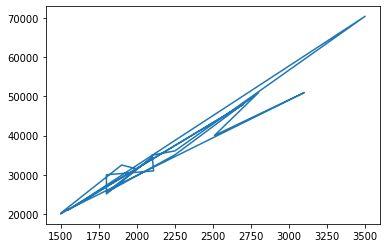

In [46]:
plt.plot(xtest, ytest)

# Best fit line

Text(0.5, 1.0, 'Rent in Bangladesh')

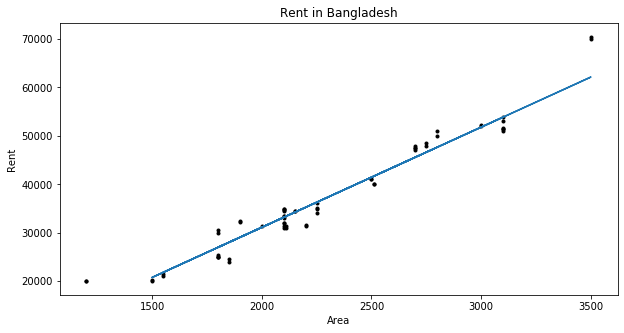

In [50]:
plt.figure(figsize=(10,5))
plt.plot(xtest, lr.predict(xtest))
plt.scatter(df['area'], df['rent'], color='black', marker='.')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent in Bangladesh")

In [51]:
lr.score(xtest, ytest) # squard value

0.9515542918540623

In [52]:
lr.score(xtrain, ytrain)

0.9471905709752625